In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [144]:
from sklearn.datasets import load_iris

In [146]:
data = load_iris()

In [148]:
df = pd.DataFrame(data=data.data , columns= data.feature_names) 

In [150]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [152]:
y = data.target

In [154]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
X = df

In [158]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=True)

In [160]:
X_train.shape , X_test.shape

((105, 4), (45, 4))

In [162]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

In [164]:
classifier

DecisionTreeClassifier(criterion='entropy')

In [166]:
classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [168]:
# Visualizing 

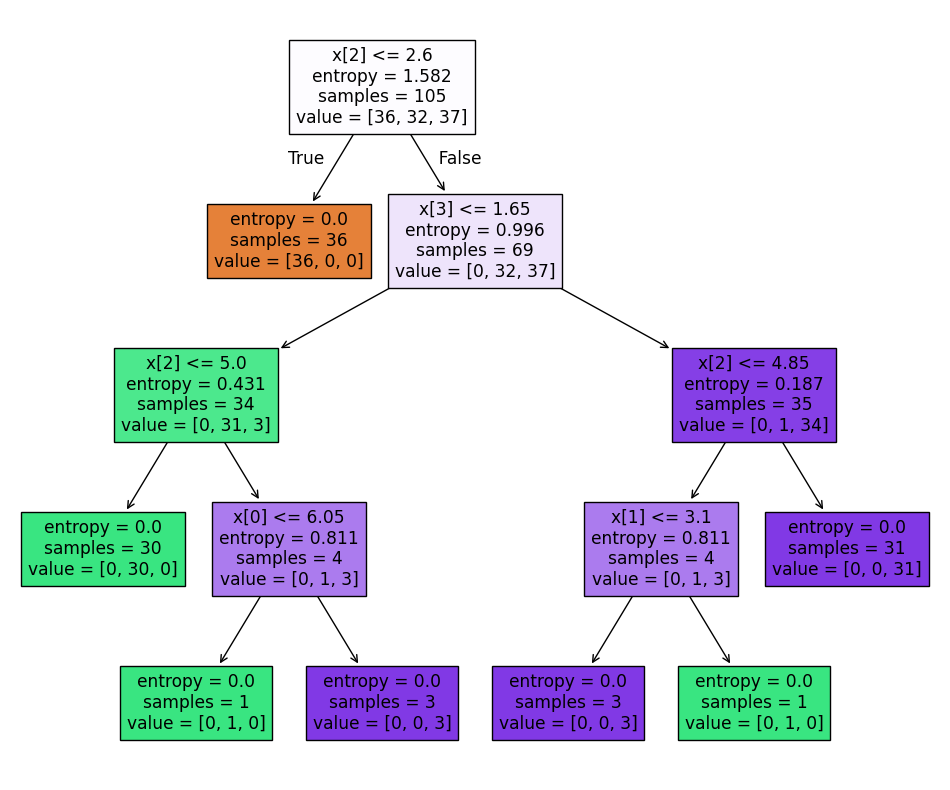

In [170]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier , filled=True)
plt.show()

In [172]:
y_pred = classifier.predict(X_test)

In [174]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred) 

0.9555555555555556

In [182]:
# Post Pruning >> avoiding overfitting
# Easier to do in smaller datasets not easy in large data sets

In [184]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy' , max_depth= 2)
classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

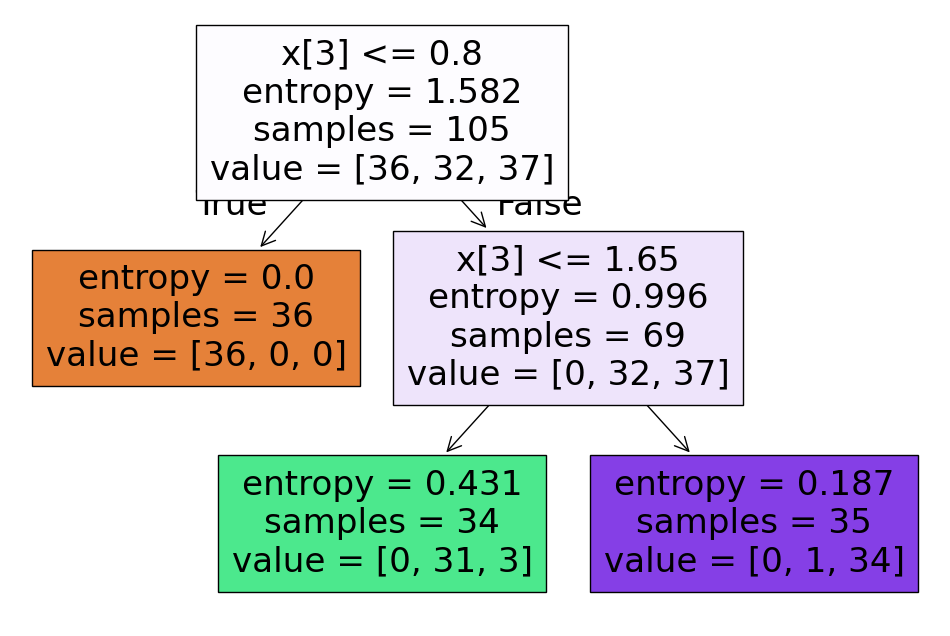

In [188]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(classifier , filled=True)
plt.show()

In [192]:
y_pred = classifier.predict(X_test)

In [194]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9555555555555556

In [198]:
# Since the accuracy is same as earlier it clearly means that the model was overfitting

In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [202]:
# pre-pruning >> Hyperparameter tuning

In [233]:
parameter = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5,6 ,7 ,10],
    'max_features' :['sqrt' , 'log2' , 'auto']
}

In [235]:
from sklearn.model_selection import GridSearchCV 
clf = DecisionTreeClassifier()
model = GridSearchCV(clf , param_grid=parameter , cv = 5 , scoring='accuracy' , verbose=3)

In [237]:
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [239]:
model.fit(X_train , y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.524 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [241]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [243]:
model.best_score_

0.9714285714285715

In [245]:
y_pred = model.best_estimator_.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [247]:
accuracy_score(y_test , y_pred)

0.9555555555555556